In [45]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# add path
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1'
sys.path.insert(0,my_path + r'\code\COMMON')

# basic imports 
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Build dataset

In [46]:
from proj1_helpers import load_csv_data 
from outliers import handle_outliers
from standard import standardize

# load raw data
y_raw, input_data_raw, ids = load_csv_data(my_path + r'\data\train.csv', sub_sample=False)

# handle outliers
X0, y = handle_outliers(input_data_raw, y_raw, -999, True)

# standardize
X0, mean_X0, std_X0 = standardize(X0)

# set y in {0,1} instead of {-1,1}
y[np.where(y==-1)]=0

ValueError: Some errors were detected !
    Line #232873 (got 30 columns instead of 32)

In [3]:
# choose the features
ind_features = [1, 13, 4, 11, 7, 2, 16, 10, 19, 12, 23, 5, 8, 26, 21, 22, 0, 9]
X = X0[:, ind_features]
print(X.shape)

(68114, 18)


# Try fitting 
## fix gamma manually (check for convergence when the degre is low or high)

In [44]:
from build_poly import build_poly
from implementations import reg_logistic_regression

# model
arg_lr = dict()
arg_lr['method'] = 'lr'
arg_lr['loss'] = 'loglikelihood'
arg_lr['lambda_'] = 0

# build polynomial basis function
degree = 5
phi0 = build_poly(X, degree)

# standardize the degree > 1
phi = phi0
phi[:, 1:],_ ,_ = standardize(phi[:, 1:])

# optimization params
arg_lr['gamma'] = 1e-5
arg_lr['method_minimization'] = 'gd' # 'gd' (gradient_descent) or 'newton'
arg_lr['initial_w'] = np.zeros(phi.shape[1])
arg_lr['max_iters'] = 50000
arg_lr['threshold'] = 1e-1
arg_lr['debug_mode'] = 1

n_iter: 100 , ||grad|| = 1147.63087901


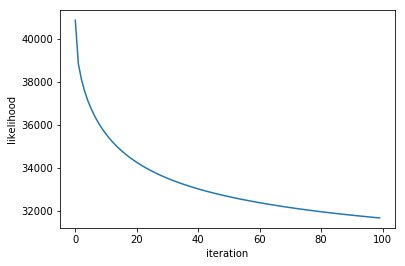

n_iter: 200 , ||grad|| = 700.051446984


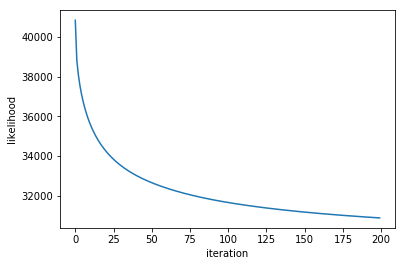

n_iter: 300 , ||grad|| = 518.51926083


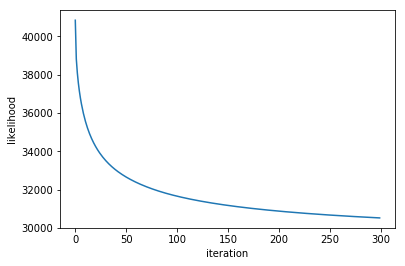

n_iter: 400 , ||grad|| = 423.1390054


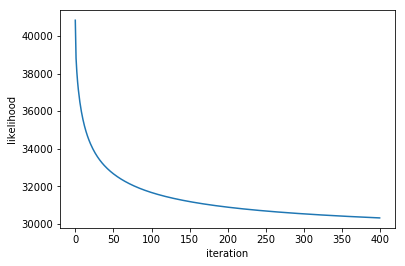

n_iter: 500 , ||grad|| = 363.141349115


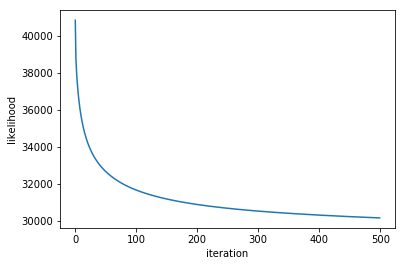

n_iter: 600 , ||grad|| = 324.976971308


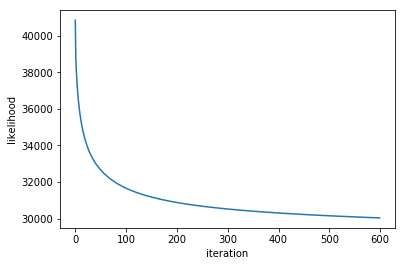

n_iter: 700 , ||grad|| = 298.512947784


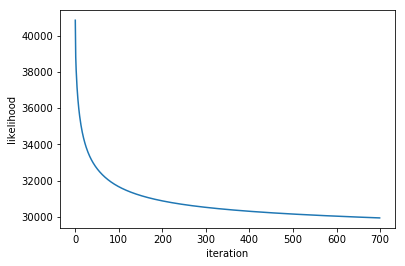

n_iter: 800 , ||grad|| = 279.935146149


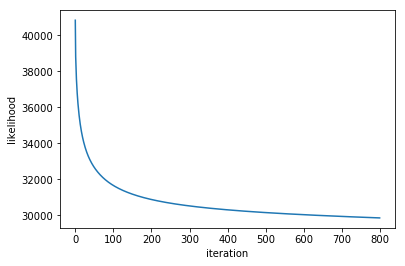

n_iter: 900 , ||grad|| = 265.950518667


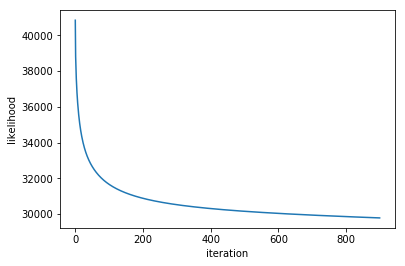

n_iter: 1000 , ||grad|| = 254.962213689


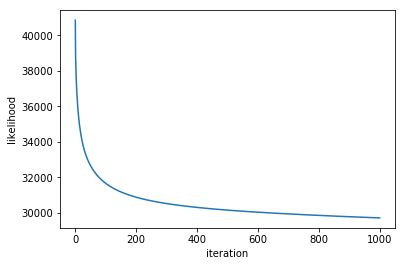

n_iter: 1100 , ||grad|| = 245.989312779


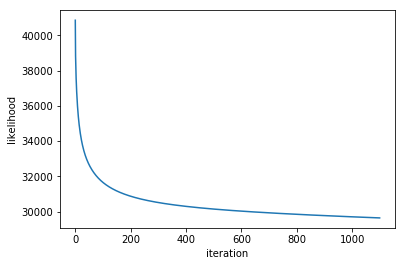

KeyboardInterrupt: 

In [43]:
# logistic regression
w_tot, loss_tot = reg_logistic_regression(y, phi, arg_lr['initial_w'], arg_lr['max_iters'], arg_lr['gamma'], arg_lr['method_minimization'], arg_lr['lambda_'], arg_lr['threshold'], arg_lr['debug_mode'] )

# Optimize degree